## PROBLEM::

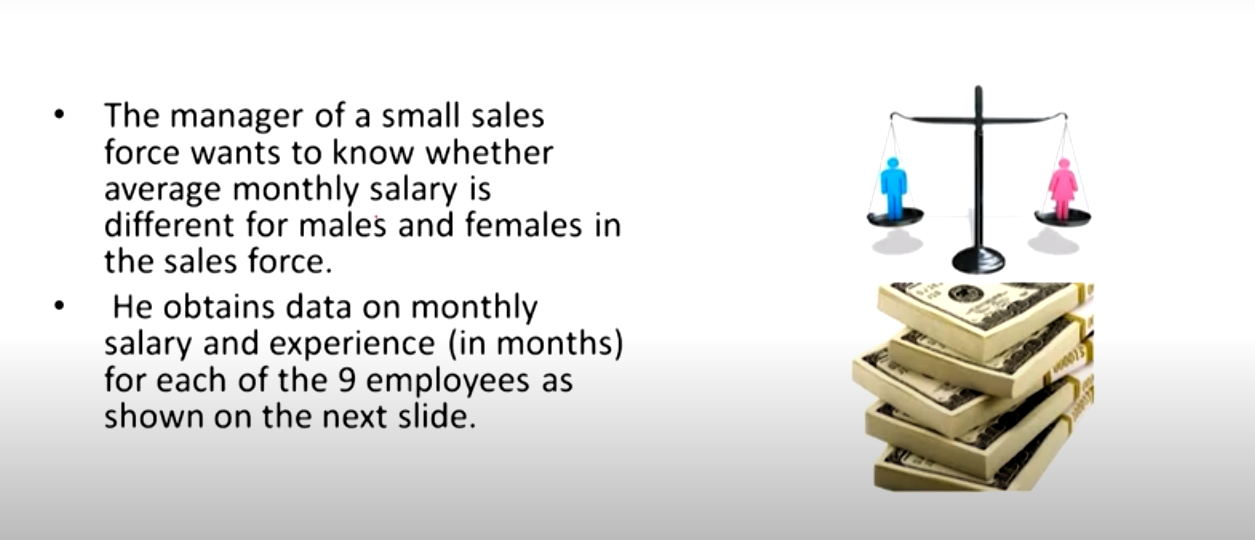

## DATA

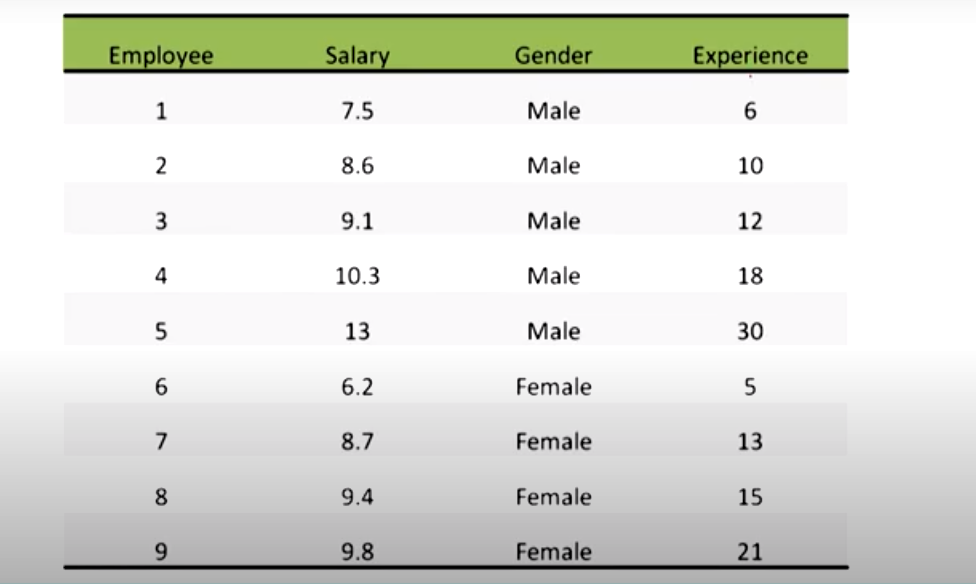

## SOLUTION::

In [29]:
import pandas as pd

data = pd.read_excel('/home/ashish/projects/MultipleLinearReg_GenderBiasedSalary/dummy2.xlsx')
data

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


Text(0.5, 1.0, 'Simple Linear Regression')

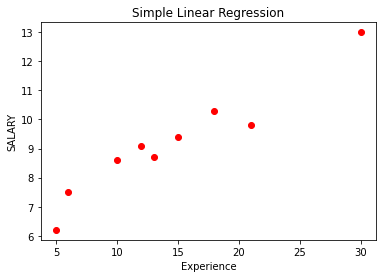

In [30]:
import matplotlib.pyplot as plt

plt.scatter(data['Experience'],data['Salary'],color="red")
plt.ylabel("SALARY")
plt.xlabel("Experience")
plt.title("Simple Linear Regression")

In [31]:
from statsmodels.formula.api import ols

model = ols(formula="Salary~Experience",data=data).fit()
model.summary()

/home/ashish/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           3.30e-05
Time:                        13:59:00   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.000       4.854       6.764
Experience     0.2332      0.025      9.360      0.000       0.174       0.292
==============================================================================
Omnibus:                        2.443   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.432
Skew:                          -0.918   Prob(JB):                        0.489
Kurtosis:                       2.331   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Therefore the regression Equtaion is :: 
Salary = 5.8093 + 0.2332*Experience

Text(0.5, 1.0, 'Standardized/Studentized Residuals Plot')

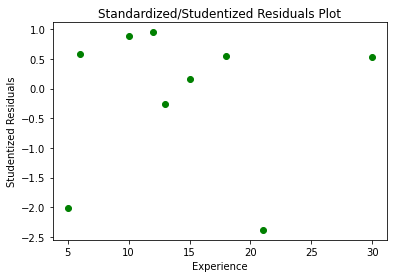

In [36]:
## Plotting the Studentized or standardized residual Plot
import matplotlib.pyplot as plt

influence = model.get_influence()
resid_student = influence.resid_studentized_external
plt.figure()
plt.scatter(data['Experience'],resid_student,color="green")
plt.ylabel("Studentized Residuals")
plt.xlabel("Experience")
plt.title("Standardized/Studentized Residuals Plot")

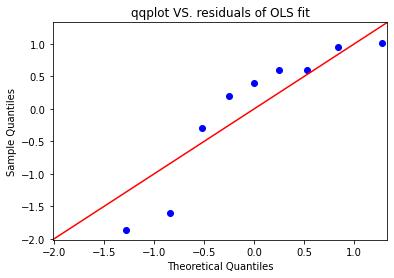

In [37]:
## plotting the normal probability plot
import statsmodels.api as s
from scipy import stats
res = model.resid
probplot = s.ProbPlot(res,stats.norm,fit=True)
probplot.qqplot(line='45')
plt.title("qqplot VS. residuals of OLS fit")
plt.show()

## NOTE::
    Here gender is an categorical variable. So we would need to define 
    dummies.

In [39]:
gender_dummies = pd.get_dummies(data['Gender'])
gender_dummies

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


In [40]:
new_data = pd.concat([data,gender_dummies],axis=1)
new_data.drop(['Gender','Male'],inplace=True,axis=1)
new_data

,Employee,Salary,Experience,Female
0,1,7.5,6,0
1,2,8.6,10,0
2,3,9.1,12,0
3,4,10.3,18,0
4,5,13.0,30,0
5,6,6.2,5,1
6,7,8.7,13,1
7,8,9.4,15,1
8,9,9.8,21,1


In [42]:
## Gender Regression Model

from statsmodels.regression.linear_model import OLS
import statsmodels.api as s
Gender_model = OLS(new_data['Salary'],s.add_constant(new_data[['Female']])).fit()
Gender_model.summary()

/home/ashish/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Mon, 17 Jan 2022   Prob (F-statistic):              0.389
Time:                        20:41:31   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7000      0.853     11.367      0.000       7.682      11.718
Female        -1.1750      1.280     -0.918      0.389      -4.202       1.852
==============================================================================
Omnibus:                        0.387   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.280
Skew:                           0.330   Prob(JB):                        0.869
Kurtosis:                       2.441   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
## complete multiple Linear Regression Model
from statsmodels.regression.linear_model import OLS
import statsmodels.api as s

multiple_model = OLS(new_data['Salary'],s.add_constant(new_data[['Experience','Female']])).fit()
multiple_model.summary()

/home/ashish/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           1.80e-05
Time:                        20:56:46   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2485      0.291     21.439      0.000       5.535       6.962
Experience     0.2271      0.016     14.089      0.000       0.188       0.267
Female        -0.7890      0.238     -3.309      0.016      -1.372      -0.206
==============================================================================
Omnibus:                        0.110   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.198
Skew:                           0.174   Prob(JB):                        0.906
Kurtosis:                       2.363   Cond. No.                         44.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multiple Linear Regression Equation:
    salary = 6.2485 + 0.2271*Experience - 0.7890*Female 





# This multiple linera regression model explains that the average monthly salary for female employees is lower than 78.90 unit as compared to male employees with equivalent experience. 